In [4]:
from pandas_datareader import data as pdr

In [5]:
import datetime

In [8]:
ticker = "AMZN"
ohlvc = pdr.get_data_yahoo(ticker, datetime.date.today() - datetime.timedelta(1025), datetime.date.today())

In [9]:
df = ohlvc.copy()

In [10]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-07,980.590027,972.549988,974.000000,979.469971,2566800,979.469971
2017-09-08,979.880005,963.469971,979.099976,965.900024,2605300,965.900024
2017-09-11,981.940002,974.219971,974.460022,977.960022,2186700,977.960022
2017-09-12,984.669983,975.520020,983.270020,982.580017,2481100,982.580017
2017-09-13,1000.000000,979.419983,983.969971,999.599976,3374700,999.599976
...,...,...,...,...,...,...
2020-06-22,2715.000000,2669.000000,2684.500000,2713.820068,3208800,2713.820068
2020-06-23,2783.110107,2718.040039,2726.020020,2764.409912,4231700,2764.409912
2020-06-24,2796.000000,2721.000000,2780.000000,2734.399902,4526600,2734.399902


In [15]:
df["MA_Fast"] = df["Adj Close"].ewm(span=12, min_periods=12).mean()

In [16]:
df["MA_Slow"] = df["Adj Close"].ewm(span=26, min_periods=26).mean()


In [17]:
df["MACD"]  = df["MA_Fast"] - df["MA_Slow"]

In [19]:
df["signal"] = df["Adj Close"].ewm(span=9, min_periods=9).mean()

In [20]:
df.dropna(inplace=True)

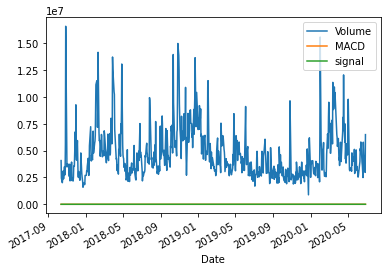

In [21]:
df.iloc[:, [4,8,9]].plot()

In [32]:
def MACD(DF, a,b,c):
    df = DF.copy()
    df["MA_Fast"] = df["Adj Close"].ewm(span=a, min_periods=a).mean()
    df["MA_Slow"] = df["Adj Close"].ewm(span=b, min_periods=b).mean()
    df["MACD"]  = df["MA_Fast"] - df["MA_Slow"]
    df["signal"] = df["Adj Close"].ewm(span=c, min_periods=c).mean()
    df.dropna(inplace=True)

    return df


In [33]:
df_test = MACD(ohlvc, 12,26, 9)

In [31]:
df_test

,High,Low,Open,Close,Volume,Adj Close,MA_Fast,MA_Slow,MACD,signal
Date,,,,,,,,,,
